<a href="https://colab.research.google.com/github/venki24/Parkzap-Image-Classification-Assignmnet/blob/master/Assignment_Model_Completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.layers import Dropout, BatchNormalization, ZeroPadding2D
from keras.models import Sequential
from keras.optimizers import RMSprop,adam
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
def Data_prep():
    
    train_gen = image.ImageDataGenerator(rescale = 1./255,
                                    featurewise_center=True, 
                                    samplewise_center=True, 
                                    featurewise_std_normalization=True, 
                                    samplewise_std_normalization=True, 
                                    zca_whitening=False, zca_epsilon=1e-06, 
                                    rotation_range=40, width_shift_range=0.0,
                                    height_shift_range=0.0, brightness_range=(0.2, 0.2),
                                    shear_range=0.2, zoom_range=0.2, 
                                    channel_shift_range=0.0, fill_mode='nearest', 
                                    cval=0.0, horizontal_flip=True, vertical_flip=True,
                                    data_format=None, validation_split=0.0, dtype=None)
    
    test_gen = image.ImageDataGenerator(rescale = 1./255,
                                    featurewise_center=True, 
                                    samplewise_center=True, 
                                    featurewise_std_normalization=True, 
                                    samplewise_std_normalization=True, 
                                    zca_whitening=False, zca_epsilon=1e-06, 
                                    rotation_range=40, width_shift_range=0.0,
                                    height_shift_range=0.0, brightness_range=(0.2, 0.2),
                                    shear_range=0.2, zoom_range=0.2, 
                                    channel_shift_range=0.0, fill_mode='nearest', 
                                    cval=0.0, horizontal_flip=True, vertical_flip=True,
                                    data_format=None, validation_split=0.0, dtype=None)
    
    val_gen = image.ImageDataGenerator(rescale = 1./255,
                                    featurewise_center=True, 
                                    samplewise_center=True, 
                                    featurewise_std_normalization=True, 
                                    samplewise_std_normalization=True, 
                                    zca_whitening=False, zca_epsilon=1e-06, 
                                    rotation_range=40, width_shift_range=0.0,
                                    height_shift_range=0.0, brightness_range=(0.2, 0.2),
                                    shear_range=0.2, zoom_range=0.2, 
                                    channel_shift_range=0.0, fill_mode='nearest', 
                                    cval=0.0, horizontal_flip=True, vertical_flip=True,
                                    data_format=None, validation_split=0.0, dtype=None)
    
    
    train_dir = train_gen.flow_from_directory(r"/content/drive/My Drive/cars 32/train",
                                           target_size = (32, 32),
                                           classes = ['Jeep', 'Maruthi Suzuki Swift'],
                                           class_mode = 'categorical',
                                           batch_size = 64,
                                           seed = 1)
    
    test_dir = test_gen.flow_from_directory(r"/content/drive/My Drive/cars 32/test",
                                           target_size = (32, 32),
                                           classes = ['Jeep', 'Maruthi Suzuki Swift'],
                                           class_mode = 'categorical',
                                           batch_size = 64,
                                           seed = 1)
    
    val_dir = val_gen.flow_from_directory(r"/content/drive/My Drive/cars 32/val",
                                           target_size = (32, 32),
                                           classes = ['Jeep', 'Maruthi Suzuki Swift'],
                                           class_mode = 'categorical',
                                           batch_size = 64,
                                           seed = 1)
    
    return train_dir, test_dir, val_dir

In [0]:
def model_creation():
    
    model = Sequential()
    
    #Conv1
    model.add(ZeroPadding2D(padding = (2, 2), input_shape= (32, 32, 3)))
    model.add(Conv2D(8, kernel_size=(3, 3), strides=(1, 1), padding='SAME',
                     activation =  'relu'))
    model.add(Conv2D(8, kernel_size=(3, 3), strides=(1, 1), padding='SAME',
                     activation =  'relu'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding = 'SAME'))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.5))
    
    #Conv2
    model.add(ZeroPadding2D(padding = (2, 2)))
    model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding='SAME', activation =  'relu'))
    model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding='SAME',
                     activation =  'relu'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding = 'SAME'))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.5))
    #conv3
    model.add(ZeroPadding2D(padding = (2, 2)))
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='SAME', activation =  'relu'))
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='SAME',
                     activation =  'relu'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding = 'SAME'))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.5))
    
    #conv4
    model.add(ZeroPadding2D(padding = (2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='SAME',
                     activation =  'relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='SAME',
                     activation =  'relu'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding = 'SAME'))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.5))
    
    #conv5
    model.add(ZeroPadding2D(padding = (2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='SAME',
                     activation =  'relu'))
    model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='SAME',
                     activation =  'relu'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding = 'SAME'))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.5))
    #conv6
    
    #conv7
    

    #conv8
    
    
    
    #Flatten
    model.add(Flatten())
    
    #Dense1
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.5))
    
    #Dense2
    '''model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.5))'''
    
    #Dense3
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.5))
    
    #Dense4
    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.5))
    
    #Dense5
    model.add(Dense(2, activation='softmax'))
    
    
    return model
    
    


In [0]:

def train_data(model, train_dir, val_dir):
    
    
    #model summary
    model.summary()
    
    #Optimizers
    Ad = RMSprop(lr = 0.001)
    #Compile Model
    model.compile(optimizer = Ad,
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])
    
    #Fitting Model
    history = model.fit_generator(train_dir, steps_per_epoch=20,
                        epochs=500, validation_data=val_dir,
                        validation_steps=100)
    model.save(r'/content/drive/My Drive/Parkzap/weights3.h5')
    
    return history


In [0]:
def test_data(model, test_dir):
    
    #Evaluating 
    score  = model.evaluate_generator(test_dir, 
                                      steps = 20)
    
    
    #printAccuracy
    print("Accuracyloss:-", score[0])
    print("AccuracyScore",score[1] )
    
    return score

In [0]:
    def plotting(history):
      print(history.history.keys())
    # summarize history for accuracy
      plt.plot(history.history['acc'])
      plt.plot(history.history['val_acc'])
      plt.title('model accuracy')
      plt.ylabel('accuracy')
      plt.xlabel('epoch')
      plt.legend(['train', 'test'], loc='upper left')
      plt.show()
      plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
      plt.title('model loss')
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train', 'test'], loc='upper left')
      plt.show()


Found 1515 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 36, 36, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 36, 8)         224       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 8)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 36, 36, 8)         32        
_

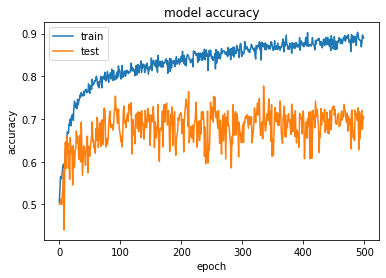

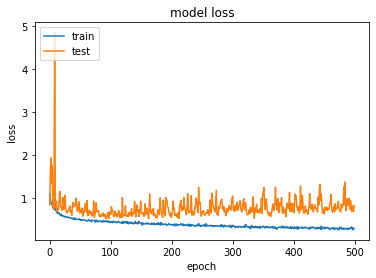

In [0]:
if __name__ == '__main__':
    
    data = Data_prep()
    
    train_dir, test_dir, val_dir = data
    
    model = model_creation()
    
    history = train_data(model, train_dir, val_dir)
    
    test = test_data(model, test_dir)
    
    plotting(history)